# ENSTA ParisTech - SOD322 - RODM

## Models for real mobile networks

*Alexia CALANDRAS & Imad EL HANAFI.*



***

First, we load necessary packages and datasets.
Extract some large matrices (if you want to avoid generating them in the code)

In [1]:
import zipfile
path_to_zip_file = "res.zip"
zip_ref = zipfile.ZipFile(path_to_zip_file, 'r')
zip_ref.extractall('res')
zip_ref.close()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

%matplotlib inline
plt.rcParams.update({'font.size': 18})

# Read data
RN = pd.read_csv("dataensta/RollerNet", sep =" " , header = -1)
IC = pd.read_csv("dataensta/Infocom06", sep =" " , header = -1)

RN = np.asarray(RN)
IC = np.asarray(IC)

# Print data
#Useful function to print the head of two matrices
def print_(RN,IC):
    print("RN data - head : ")
    print(pd.DataFrame(RN).head())
    print("\n###################")
    print("\n IC data - head: ")
    print(pd.DataFrame(IC).head())

## Print
print_(RN,IC)

RN data - head : 
   0  1     2     3
0  1  2   991   991
1  1  2  1192  1192
2  1  2  1210  1210
3  1  2  1290  1290
4  1  2  1319  1319

###################

 IC data - head: 
   0  1      2      3
0  1  3  45796  45796
1  1  3  45963  45963
2  1  3  46326  46326
3  1  3  55106  55106
4  1  3  56866  56866


### Question 1

Compute number of nodes, number of contacts and total duration.

In [2]:
# Question 1

def characteristics(data):
    # data : Array of the same format as RN and IC
    nb_Nodes = max(np.max(data[:,0]), np.max(data[:,1]))
    nb_Contacts = (data[:,0]).shape[0]
    tot_Duration = np.max(data[:,3]) - np.min(data[:,2])
    
    return nb_Nodes, nb_Contacts, tot_Duration

#######

nb_Nodes_IC, nb_Contacts_IC, tot_Duration_IC = characteristics(IC)
print("IC\nNombre de noeuds = ",nb_Nodes_IC,
      "\nNombre de contacts = ",nb_Contacts_IC,
      "\nDurée totale = ",tot_Duration_IC)

nb_Nodes_RN, nb_Contacts_RN, tot_Duration_RN = characteristics(RN)
print("\nRN\nNombre de noeuds = ",nb_Nodes_RN,
      "\nNombre de contacts = ",nb_Contacts_RN,
      "\nDurée totale = ",tot_Duration_RN)

IC
Nombre de noeuds =  98 
Nombre de contacts =  148784 
Durée totale =  337418

RN
Nombre de noeuds =  62 
Nombre de contacts =  59410 
Durée totale =  9976


### Question 2

Normalize the datasets.

In [3]:
# Question 2

def normalize(data):
    time = np.min(data[:,2]) 
    
    output = np.copy(data)
    output[:,2] = output[:,2] - time
    output[:,3] = output[:,3] - time
    
    return output

######

IC_norm = normalize(IC)
RN_norm = normalize(RN)

# Print
print("Normalized data \n")    
print_(RN_norm,IC_norm)

Normalized data 

RN data - head : 
   0  1     2     3
0  1  2   827   827
1  1  2  1028  1028
2  1  2  1046  1046
3  1  2  1126  1126
4  1  2  1155  1155

###################

 IC data - head: 
   0  1      2      3
0  1  3  45796  45796
1  1  3  45963  45963
2  1  3  46326  46326
3  1  3  55106  55106
4  1  3  56866  56866


### Question 3

Reshape the datasets to get a dataframe of the following kind : `Time, Node 1, Node 2, Type of event (creation/deletion)`.

In [4]:
# Question 3

def cs(data):
    # return type of event : creation,/deletion
    C = np.column_stack((data[:,2],data[:,0],data[:,1],np.repeat('C',data.shape[0])))
    S = np.column_stack((data[:,3]+1,data[:,0],data[:,1],np.repeat('S',data.shape[0])))
    return np.vstack((C,S))

####

A_IC = cs(IC_norm)
A_IC = A_IC[(A_IC[:,0].astype(int)).argsort()] # sort by time

####

A_RN = cs(RN_norm)
A_RN = A_RN[(A_RN[:,0].astype(int)).argsort()] # sort by time

# Print
print("Transformed data")
print_(A_RN,A_IC)

Transformed data
RN data - head : 
    0   1   2  3
0   0  22  31  C
1   1  22  31  S
2  12  22  31  C
3  13  22  31  S
4  37  31  44  C

###################

 IC data - head: 
     0   1   2  3
0    0  13  17  C
1  375   3  14  C
2  463  16  53  C
3  526   4   5  C
4  710  22  25  C


### Question 4

Compute inter-contact duration.

In [5]:
# Question 4 

def inter_contact(data):
    # data : input as IC or RN
    #return inter-contact matrix containing : node1, node2, inter-contact duration
    n = data.shape[0]
    inter_contact = np.empty([n, 3])
    m = 0
    
    for i in range(n-1):
        if((data[i,0] == data[i+1,0]) & (data[i,1] == data[i+1,1])):
            m = m+1
            inter_contact[m,:] = [data[i,0],data[i,1],data[i+1,2] - data[i,3] - 1]
    return(inter_contact[1:m,:])

######

inter_contact_IC = inter_contact(IC)
inter_contact_RN = inter_contact(RN)

### Question 5

Display inter-contact duration.

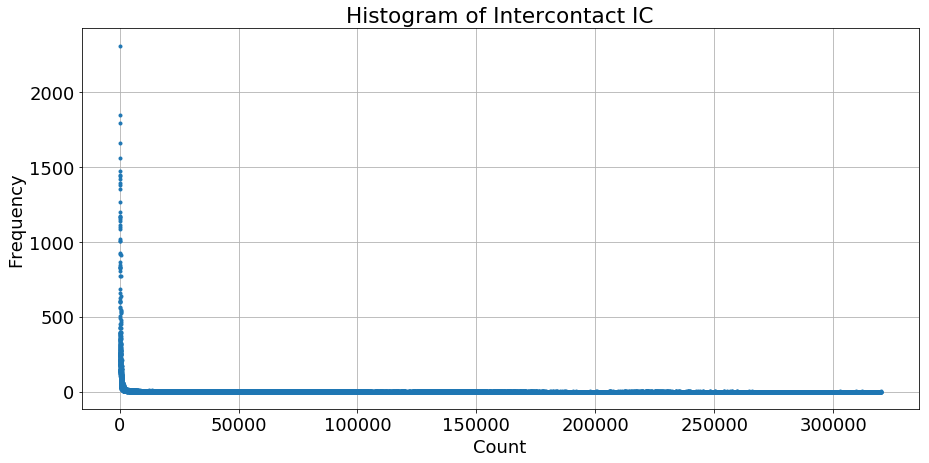

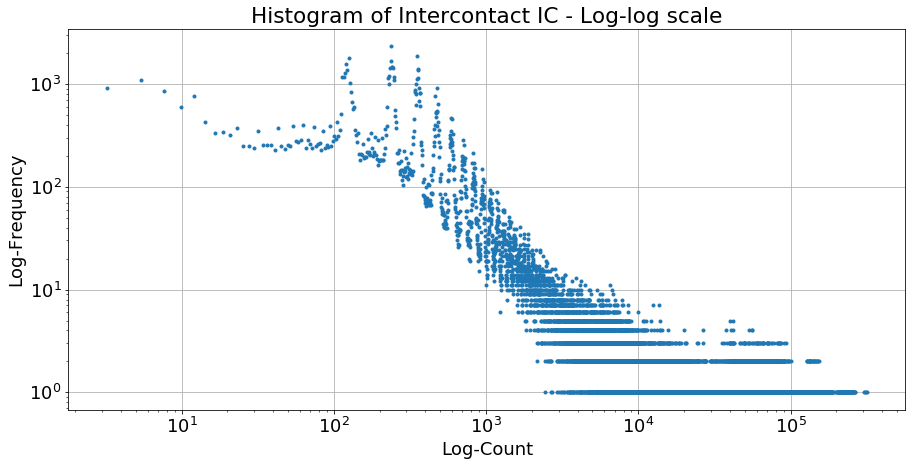

In [6]:
# Question 5 - IC
Hist_IC = np.histogram(inter_contact_IC[:,2], bins = len(inter_contact_IC[:,2]))
plt.figure(figsize=(15,7))
plt.plot(Hist_IC[1][1:],Hist_IC[0],'.')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Histogram of Intercontact IC')
plt.grid(True)

# Log log
Hist_IC = np.histogram(inter_contact_IC[:,2], bins = len(inter_contact_IC[:,2]))
plt.figure(figsize=(15,7))
plt.loglog(Hist_IC[1][1:],Hist_IC[0],'.')
plt.xlabel('Log-Count')
plt.ylabel('Log-Frequency')
plt.title('Histogram of Intercontact IC - Log-log scale')
plt.grid(True)

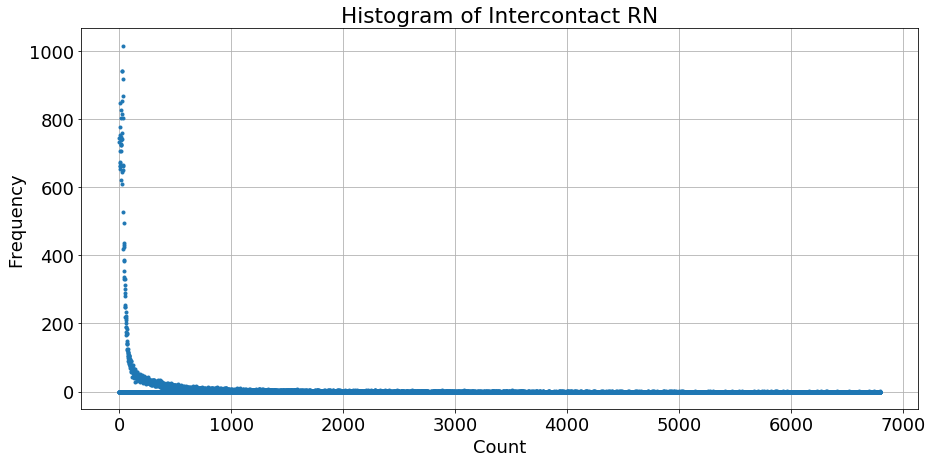

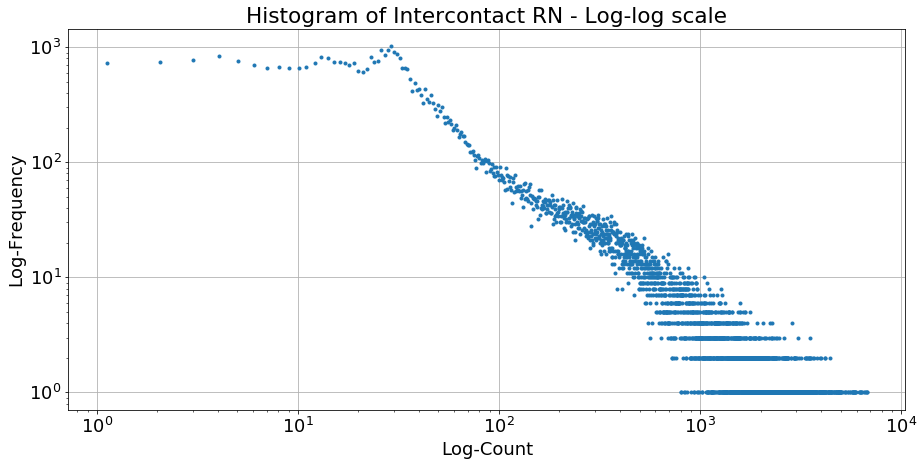

In [7]:
# Question 5 - RN
Hist_RN = np.histogram(inter_contact_RN[:,2], bins = len(inter_contact_RN[:,2]))
plt.figure(figsize=(15,7))
plt.plot(Hist_RN[1][1:],Hist_RN[0],'.')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Histogram of Intercontact RN')
plt.grid(True)

# Log log
Hist_RN = np.histogram(inter_contact_RN[:,2], bins = len(inter_contact_RN[:,2]))
plt.figure(figsize=(15,7))
plt.loglog(Hist_RN[1][1:],Hist_RN[0],'.')
plt.xlabel('Log-Count')
plt.ylabel('Log-Frequency')
plt.title('Histogram of Intercontact RN - Log-log scale')
plt.grid(True)

### Question 6

Compute the average degree at each time.

In [8]:
# Question 6

def avg_degree(data,Nb_nodes,t):
    # a function that return acg-degree of data (containing N_nodes) at time t
    # data of the form : A_IC/A-RN
    dim = 2*np.shape(data[(data[:,2] <= t) & (data[:,3] >= t)])[0]
    return (dim/Nb_nodes)


*Attention : la case ci-dessous prend un peu plus de 4 minutes à être exécutée.*

In [9]:
tt = time.time()
all_times_IC = A_IC[:,0].astype(int)
time_points_IC = np.arange(np.min(all_times_IC),np.max(all_times_IC))

Avg_degree_IC = [avg_degree(IC_norm,nb_Nodes_IC,t) for t in time_points_IC]

all_times_RN = A_RN[:,0].astype(int)
time_points_RN = np.arange(np.min(all_times_RN),np.max(all_times_RN))
Avg_degree_RN = [avg_degree(RN_norm,nb_Nodes_RN,t) for t in time_points_RN]

print(time.time() - tt)

244.07742619514465


### Question 7

Display the average degree over time.

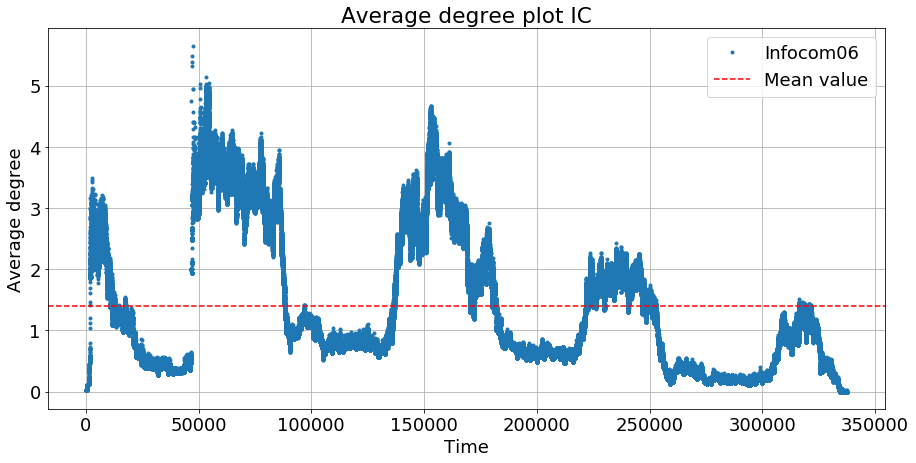

In [10]:
# Question 7 
plt.figure(figsize=(15,7))
plt.plot(Avg_degree_IC,'.', label = 'Infocom06')
plt.axhline(y=np.mean(Avg_degree_IC), color='r', linestyle='--', label = 'Mean value')
plt.xlabel('Time')
plt.ylabel('Average degree')
plt.title('Average degree plot IC')
plt.legend()
plt.grid(True)

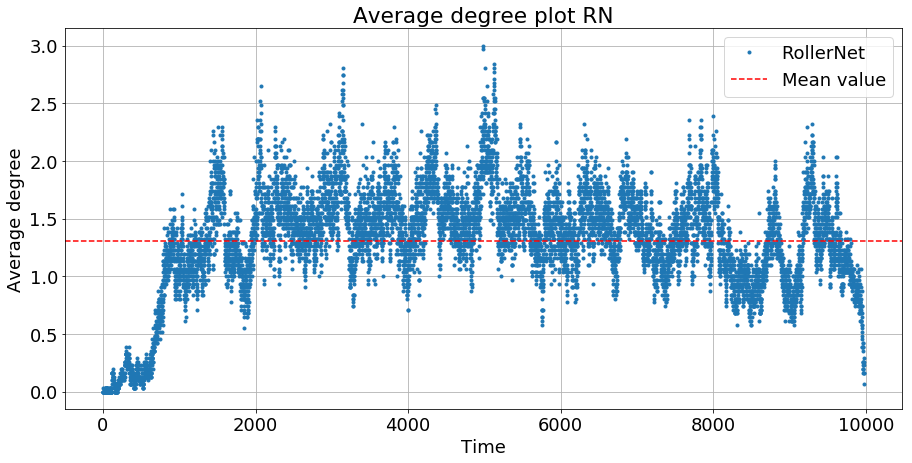

In [11]:
# Question 7 
plt.figure(figsize=(15,7))
plt.plot(Avg_degree_RN,'.', label = 'RollerNet')
plt.axhline(y=np.mean(Avg_degree_RN), color='r', linestyle='--', label = 'Mean value')
plt.xlabel('Time')
plt.ylabel('Average degree')
plt.title('Average degree plot RN')
plt.legend()
plt.grid(True)

### Question 8

Compute the fraction of created and deleted links at each time.

In [12]:
# Question 8

def Create_Delete_Fraction(data,all_times,Nb_nodes):
    # data : same as A_IC - ordrered by time 
    # returns created and deleted fraction at each time step

    ###### Part 1 :
    # create_delete a matrix containing 
    # (time t, nb of created links, nb of deleted links, nb of existed links at previous time)
    # i.e. 4 elements

    #all_times = data[:,0].astype(int)
    time_size = np.max(all_times) - np.min(all_times) 
    n = data.shape[0] # number of creations/deletions
    
    # matrix of creation/deletion 
    create_delete = np.zeros([time_size, 4])
    
    # Time column
    create_delete[:,0] = np.arange(time_size)

    # Get useful data 
    # Type of link : C or S
    type_link = data[:,3].astype(str)
    
    t = 0 # indice on times will represent the actual time of observation
    
    for obs in range(n): # for each creation/deletion
        while (all_times[obs] > t): # if the corresponding time (of creation or deletion)
            # is bigger than the actual time (t), then we move to the next time
            t = t + 1
        if(t==time_size): # we stop at the end
            break
        if((all_times[obs] == t)): # if the corresponding time (of the creation or deletion)
            # corresponds to the actual time t then
            if(type_link[obs] == 'C'):
                create_delete[t,1] = create_delete[t,1] + 1 # Augment created
            elif(type_link[obs] == 'S'):
                create_delete[t,2] = create_delete[t,2] + 1 # augment deleted

    # complete 4th column -  nb of existed links at previous time
    for t in np.arange(1,time_size):
        create_delete[t,3] = create_delete[t-1,3] + create_delete[t-1,1] - create_delete[t-1,2];

    ######### Part 2 :  Processing
    Fractions_create_delete = np.zeros([time_size, 3])
    # contains : time, fractions created, fractions deleted
    total_links = Nb_nodes*(Nb_nodes-1)/2
    
    # by definition (given in Q8 - project)
    Fractions_create_delete[:,0] = create_delete[:,0] # Time column
    Fractions_create_delete[:,1] = create_delete[:,1]/(total_links- create_delete[:,3])
    Fractions_create_delete[:,2] = create_delete[:,2]/(create_delete[:,3])
    
    # Replace nan by -1 (creation impossible)
    Fractions_create_delete[np.isnan(Fractions_create_delete)] = -1
        
    return Fractions_create_delete

In [13]:
#Save into txt
# IC
Fractions_create_delete_IC = Create_Delete_Fraction(A_IC,all_times_IC,nb_Nodes_IC)
np.savetxt('res/IC_create_delete.txt',Fractions_create_delete_IC,delimiter=',')

# RN
Fractions_create_delete_RN = Create_Delete_Fraction(A_RN,all_times_RN,nb_Nodes_RN)
np.savetxt('res/RN_create_delete.txt',Fractions_create_delete_RN,delimiter=',')

C:\Users\a-nca\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in true_divide


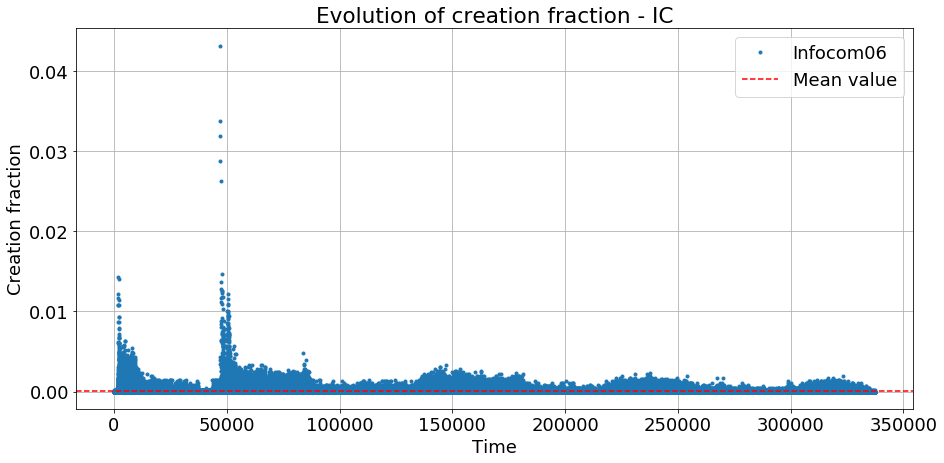

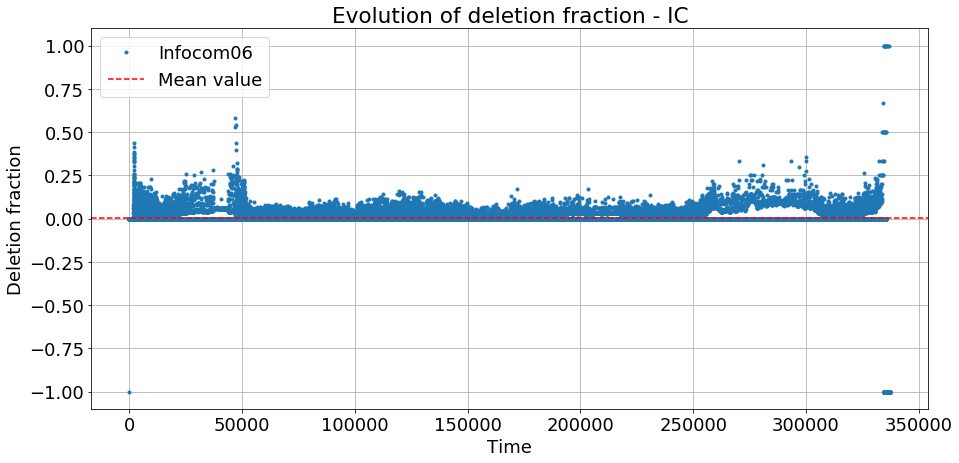

In [14]:
### IC

# Evolution of creation
plt.figure(figsize=(15,7))
plt.plot(Fractions_create_delete_IC[:,1],'.', label = 'Infocom06')
plt.axhline(y=np.mean(Fractions_create_delete_IC[:,1]), color='r', linestyle='--', label = 'Mean value')
plt.xlabel('Time')
plt.ylabel('Creation fraction')
plt.title('Evolution of creation fraction - IC')
plt.legend()
plt.grid(True)

# Evolution of deletion
plt.figure(figsize=(15,7))
plt.plot(Fractions_create_delete_IC[:,2],'.', label = 'Infocom06')
plt.axhline(y=np.mean(Fractions_create_delete_IC[:,2][Fractions_create_delete_IC[:,2] >= 0]),
            color='r', linestyle='--', label = 'Mean value')
plt.xlabel('Time')
plt.ylabel('Deletion fraction')
plt.title('Evolution of deletion fraction - IC')
plt.legend()
plt.grid(True)

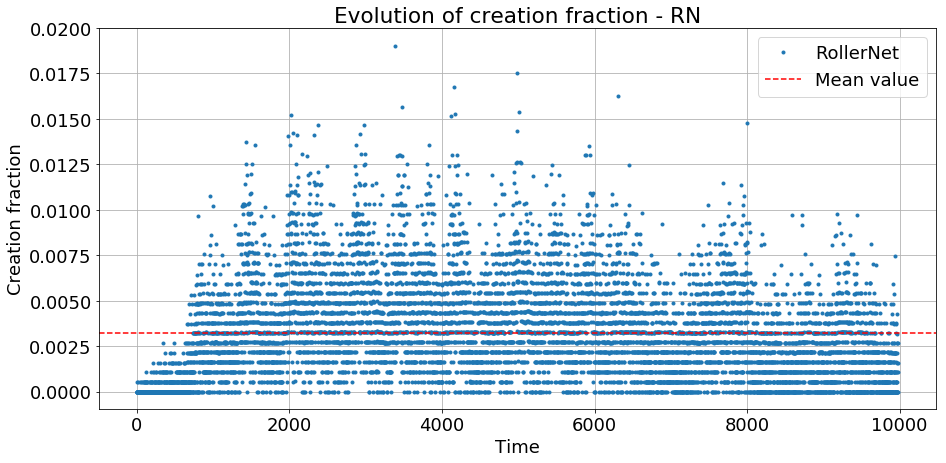

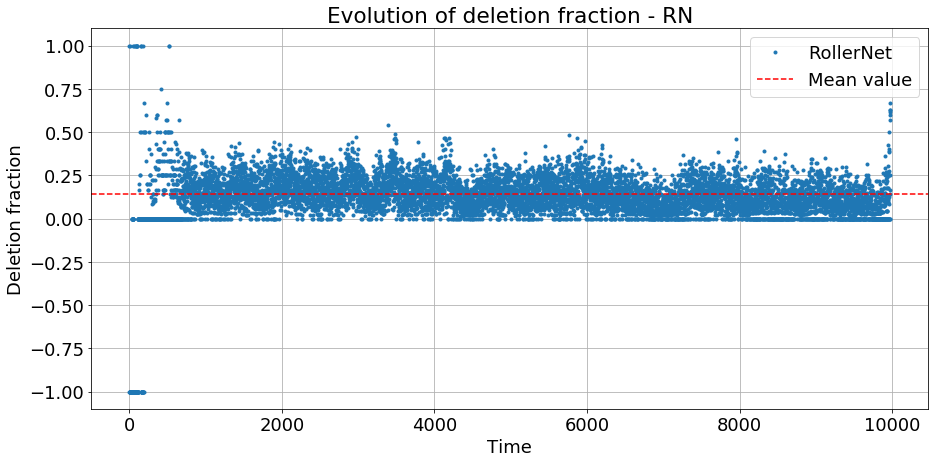

In [15]:
### RN

# Evolution of creation
plt.figure(figsize=(15,7))
plt.plot(Fractions_create_delete_RN[:,1],'.', label = 'RollerNet')
plt.axhline(y=np.mean(Fractions_create_delete_RN[:,1]), color='r', linestyle='--', label = 'Mean value')
plt.xlabel('Time')
plt.ylabel('Creation fraction')
plt.title('Evolution of creation fraction - RN')
plt.legend()
plt.grid(True)

# Evolution of deletion
plt.figure(figsize=(15,7))
plt.plot(Fractions_create_delete_RN[:,2],'.', label = 'RollerNet')
plt.axhline(y=np.mean(Fractions_create_delete_RN[:,2][Fractions_create_delete_RN[:,2] >= 0]),
            color='r', linestyle='--', label = 'Mean value')
plt.xlabel('Time')
plt.ylabel('Deletion fraction')
plt.title('Evolution of deletion fraction - RN')
plt.legend()
plt.grid(True)

In order to achieve the following simulation, we need to compute average creation and average deletion fractions for both datasets.

### Question 9

Generate a random trace according to the edge-Markovian model.

In [16]:
#### Calculate average p and d (we will ommit -1)
p_IC = Fractions_create_delete_IC[:,1]
d_IC = Fractions_create_delete_IC[:,2]

Avg_p_IC = p_IC[p_IC >= 0].mean()
Avg_d_IC = d_IC[d_IC >= 0].mean()

In [17]:
#### Calculate average p and d (we will ommit -1)
p_RN = Fractions_create_delete_RN[:,1]
d_RN = Fractions_create_delete_RN[:,2]

Avg_p_RN = p_RN[p_RN >= 0].mean()
Avg_d_RN = d_RN[d_RN >= 0].mean()

In [18]:
print("RollerNet :\np = ", Avg_p_RN)
print("d = ", Avg_d_RN)
print("\n####\n\nInfocom06 :\np = ", Avg_p_IC)
print("d = ", Avg_d_IC)

RollerNet :
p =  0.003225761011435077
d =  0.13942799025516958

####

Infocom06 :
p =  9.540691529005111e-05
d =  0.004502194235314301


In [19]:
# Question 9

########### Modelling and analysis

# A function that creates a new graph from the old one - one time step
# A graph is represented by all its edges (i,j) => une matrice Mx2 (M number of edges)

def edges(Nb_nodes):
    # a function that returns a list of possible edges formed by Nb_nodes
    # it will return a matrix containing (i,j) sc (i < j) (start from 0)
    c = []
    for i in range(Nb_nodes):
        for j in np.arange(i+1,Nb_nodes):
            c.append([i,j])
            
    return np.array(c)
        
def Next_graph(graph, p, d, Nb_nodes, edges):
    # a given graph
    # probability p of creation
    # probability q of deletion
    # returns a new graph 
    # for all edges, if it exists in graph, then delete with probability d
    # if it does not exist in graph then creat with probability p 
    
    # Check what edges exist or not
    #edges_ = edges(Nb_nodes) 
    a1_rows = edges.view([('', edges.dtype)] * edges.shape[1])
    a2_rows = graph.view([('', edges.dtype)] * edges.shape[1])
    
    edges_not_existed_before = np.setdiff1d(a1_rows,a2_rows).view(edges.dtype).reshape(-1, edges.shape[1]) 
    #edges_not_existed_before = np.setdiff1d(edges_, graph).view(a.dtype).reshape(-1, a.shape[1])

    # With probability p, choose to creat one from indice_not_existed_edges
    # With probability d choose to delete one in graph
    indice_create = np.where(np.random.uniform(0,1,edges_not_existed_before.shape[0]) < p)[0]
    indice_delete = np.where(np.random.uniform(0,1,graph.shape[0]) < d)[0]
    
    # Edges to be created and adges to be deleted
    edges_create = edges_not_existed_before[indice_create]
    edges_delete = graph[indice_delete]
    
    #print(edges_create.shape)
    
    # New graph
    New_graph = np.delete(graph,indice_delete,0)
    New_graph = np.concatenate((New_graph,edges_create),axis = 0)
    
    # New instance:
    # Created/ deleted ; there is no time here, we will add it in the external loop later
    C = np.column_stack((edges_create,np.repeat('C',edges_create.shape[0])))
    S = np.column_stack((edges_delete,np.repeat('S',edges_delete.shape[0])))

    return New_graph, np.vstack((C,S))

In [20]:
# Simulation of graph evolution - Question 9
tt = time.time()

# Start with an empty graph - Simulation for RN
graph = np.empty([0, 2])

T = tot_Duration_RN
In_list = []
p = Avg_p_RN
d = Avg_d_RN
Nb_nodes = nb_Nodes_RN
edges_ = edges(nb_Nodes_RN)

for t in range(T):
    # at each time iteration, creat a new graph and append the list of created/deleted edges
    graph, In = Next_graph(graph, p, d, Nb_nodes,edges_) 
    In = np.column_stack((np.repeat(t,In.shape[0]),In))
    In_list.append(In)

Instance_list_RN = np.concatenate(In_list, axis=0)

print(time.time() - tt)

19.620192289352417


*Attention : la case ci-dessous met 20 à 30 minutes à être exécutée.*

Pour gagner du temps, nous avons enregistré le résultat de cette cellule dans le fichier `Instance_list_IC.pkl`, il est possible d'en charger le contenu dans le notebook simplement avec la cellule qui suit celle-ci.

In [26]:
# Simulation of graph evolution - Question 9
tt = time.time()

# Start with an empty graph - Simulation for IC
graph = np.empty([0, 2])

T = tot_Duration_IC
In_list = []
p = Avg_p_IC
d = Avg_d_IC
Nb_nodes = nb_Nodes_IC
edges_ = edges(nb_Nodes_IC)

for t in range(T):
    # at each time iteration, creat a new graph and append the list of created/deleted edges
    graph, In = Next_graph(graph, p, d, Nb_nodes,edges_) 
    In = np.column_stack((np.repeat(t,In.shape[0]),In))
    In_list.append(In)

Instance_list_IC = np.concatenate(In_list, axis=0)

file = "res/Instance_list_IC.npy"
np.save(file,Instance_list_IC)

print(time.time() - tt)

937.5795509815216


In [21]:
# Load calculated simulation : Instance_list_IC
Instance_list_IC = np.load("res/Instance_list_IC.npy")

### Question 10

Compute the evolution of the average degree over time on the randomly generated traces.

In [22]:
# Question 10
# After obtaining the Instance_list, we need to recover
# the other format (IC_norm) in order to compute Avg_degree

def format_converting(data):
    # Filter on C's
    C = pd.DataFrame(data[data[:,3] == 'C'],
                 columns = ['Time1','Node1','Node2','Type']).drop(labels='Type',axis=1).astype(float)
    # Change order of columns to have Time at the end
    cols = C.columns.tolist()
    cols = cols[-2:] + cols[:-2]
    C = C[cols]
    # Filter on S's
    S = pd.DataFrame(data[data[:,3] == 'S'],
                     columns = ['Time2','Node1','Node2','Type']).drop(labels='Type',axis=1).astype(float)
    # Inverse transfo on time
    S['Time2'] = S['Time2'] - 1

    # Merge both dataframes
    out = pd.DataFrame.merge(C,S, on=['Node1','Node2'])
    # Sort dataframes to drop duplicates
    out['Dev'] = out['Time2'] - out['Time1'] #Compute the differences for each duplicate
    # Keep lines where Time2 is >= Time1 and sort deviations per ascending order
    out = out[out['Dev'] >=0].sort_values(['Node1','Node2','Time1','Dev'],ascending = [True, True, True, True])
    # Drop duplicates keeping the first line (i.e. which minimal deviation)
    out = out.drop_duplicates(subset=['Node1', 'Node2', 'Time1'], keep='first', inplace=False)
    # Remove temporary column 'Dev'
    out = out.drop(labels='Dev',axis=1)

    return out

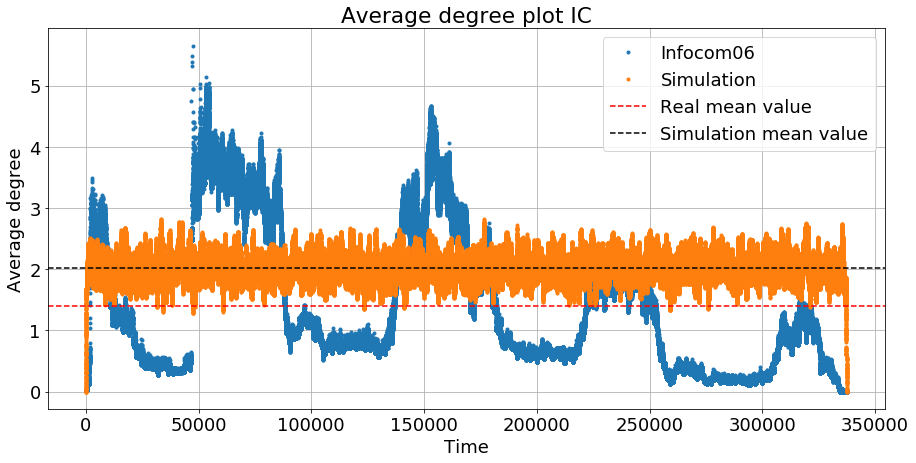

In [23]:
IC_sim = format_converting(Instance_list_IC).values

Avg_degree_IC_sim = [avg_degree(IC_sim,nb_Nodes_IC,t) for t in time_points_IC]

# Plot average degree IC
plt.figure(figsize=(15,7))
plt.plot(Avg_degree_IC,'.', label = 'Infocom06')
plt.plot(Avg_degree_IC_sim,'.', label = 'Simulation')
plt.axhline(y=np.mean(Avg_degree_IC), color='r', linestyle='--', label = 'Real mean value')
plt.axhline(y=np.mean(Avg_degree_IC_sim), color='k', linestyle='--', label = 'Simulation mean value')
plt.xlabel('Time')
plt.ylabel('Average degree')
plt.title('Average degree plot IC')
plt.legend()
plt.grid(True)

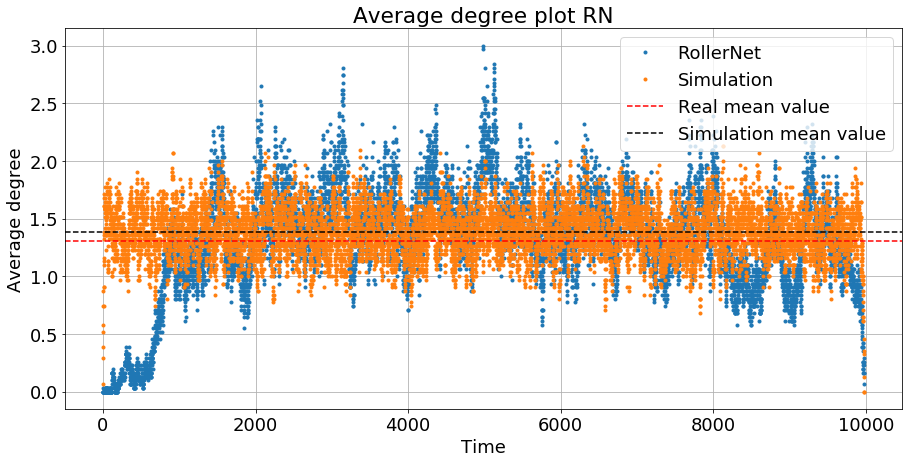

In [24]:
RN_sim = format_converting(Instance_list_RN).values

Avg_degree_RN_sim = [avg_degree(RN_sim,nb_Nodes_RN,t) for t in time_points_RN]

plt.figure(figsize=(15,7))
plt.plot(Avg_degree_RN,'.', label = 'RollerNet')
plt.plot(Avg_degree_RN_sim,'.', label = 'Simulation')
plt.axhline(y=np.mean(Avg_degree_RN), color='r', linestyle='--', label = 'Real mean value')
plt.axhline(y=np.mean(Avg_degree_RN_sim), color='k', linestyle='--', label = 'Simulation mean value')
plt.xlabel('Time')
plt.ylabel('Average degree')
plt.title('Average degree plot RN')
plt.legend()
plt.grid(True)

### Question 11

In order to conclude on the relevancy of the simulations, let us compare the inter contact duration of simulations and real networks.

In [25]:
inter_contact_IC_sim = inter_contact(IC_sim)
inter_contact_RN_sim = inter_contact(RN_sim)

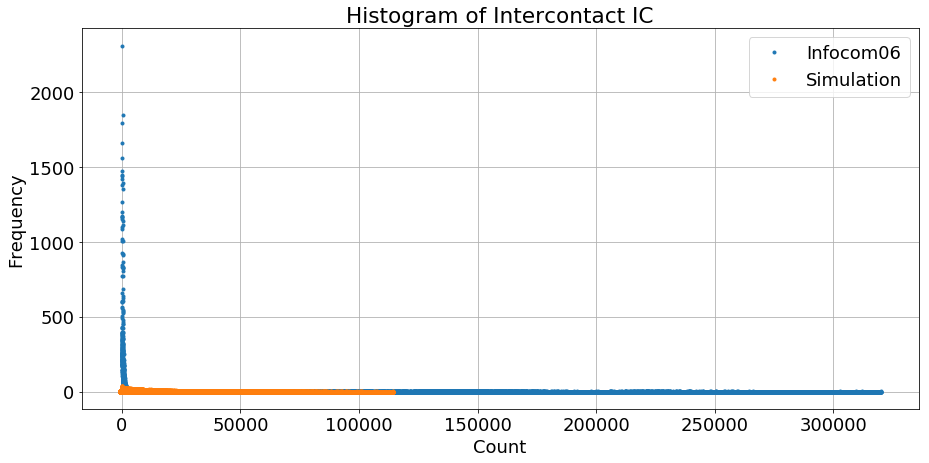

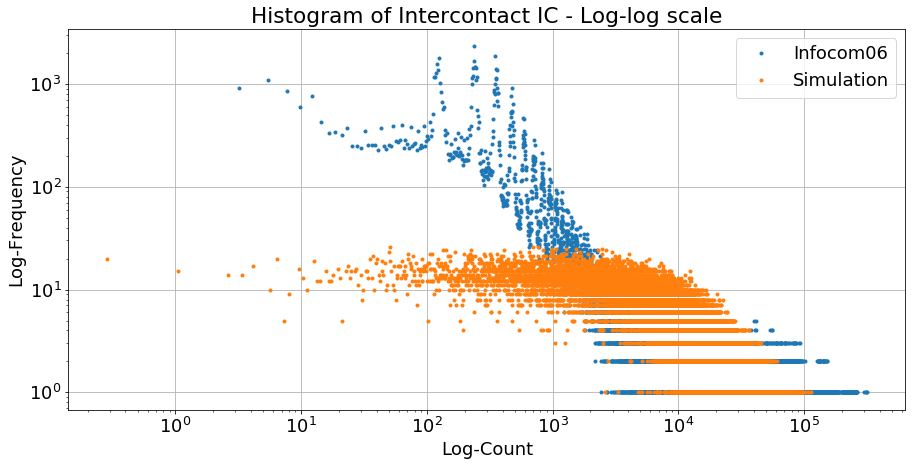

In [26]:
# Like question 5 - IC
Hist_IC_sim = np.histogram(inter_contact_IC_sim[:,2], bins = len(inter_contact_IC_sim[:,2]))

plt.figure(figsize=(15,7))
plt.plot(Hist_IC[1][1:],Hist_IC[0],'.', label = 'Infocom06')
plt.plot(Hist_IC_sim[1][1:],Hist_IC_sim[0],'.', label = 'Simulation')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Histogram of Intercontact IC')
plt.legend()
plt.grid(True)


plt.figure(figsize=(15,7))
plt.loglog(Hist_IC[1][1:],Hist_IC[0],'.', label = 'Infocom06')
plt.loglog(Hist_IC_sim[1][1:],Hist_IC_sim[0],'.', label = 'Simulation')
plt.xlabel('Log-Count')
plt.ylabel('Log-Frequency')
plt.title('Histogram of Intercontact IC - Log-log scale')
plt.legend()
plt.grid(True)

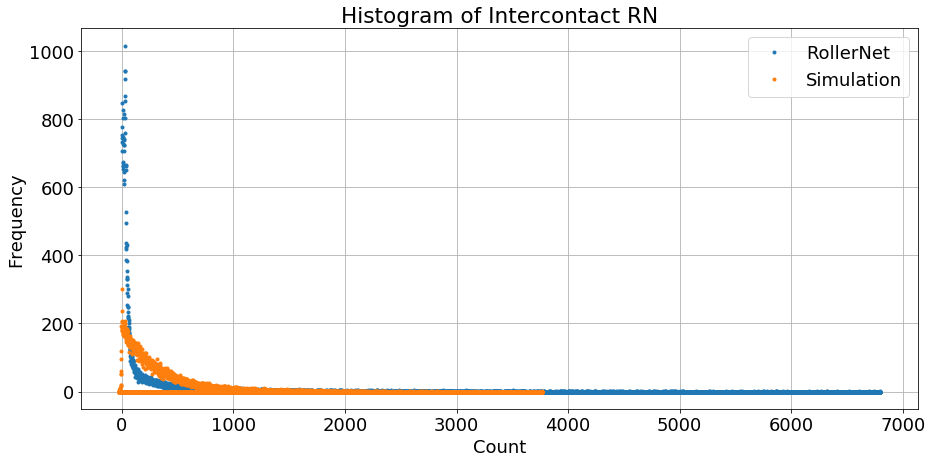

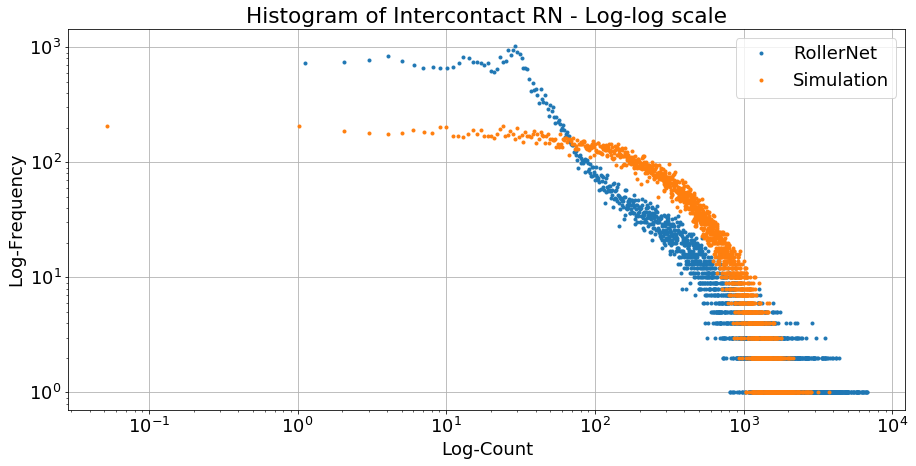

In [27]:
# Like question 5 - RN

Hist_RN_sim = np.histogram(inter_contact_RN_sim[:,2], bins = len(inter_contact_RN_sim[:,2]))

plt.figure(figsize=(15,7))
plt.plot(Hist_RN[1][1:],Hist_RN[0],'.', label = 'RollerNet')
plt.plot(Hist_RN_sim[1][1:],Hist_RN_sim[0],'.', label = 'Simulation')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Histogram of Intercontact RN')
plt.legend()
plt.grid(True)


plt.figure(figsize=(15,7))
plt.loglog(Hist_RN[1][1:],Hist_RN[0],'.', label = 'RollerNet')
plt.loglog(Hist_RN_sim[1][1:],Hist_RN_sim[0],'.', label = 'Simulation')
plt.xlabel('Log-Count')
plt.ylabel('Log-Frequency')
plt.title('Histogram of Intercontact RN - Log-log scale')
plt.legend()
plt.grid(True)

### Question 12

### RN simulation

In this question, we will estimate the density of $p$ and $d$ using kernel density estimation.

(-0.02, 5)

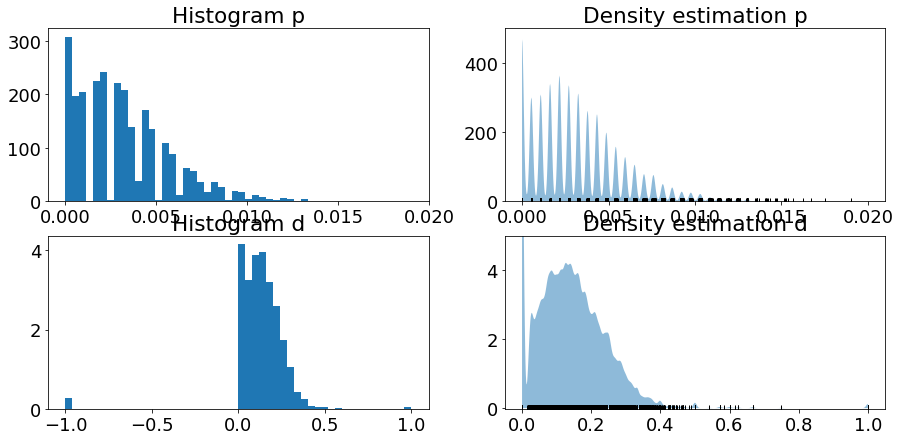

In [44]:
from sklearn.neighbors import KernelDensity

p = Fractions_create_delete_RN[:,1]
d = Fractions_create_delete_RN[:,2]

# Plot histogram:
plt.figure(figsize=(15,7))

plt.subplot(221)
hist = plt.hist(p, bins=50, normed=True)
plt.title('Histogram p')

# Check density sums to 1
#density, bins, patches = hist
#widths = bins[1:] - bins[:-1]
#(density * widths).sum()

#### KDE Model for p - IMPORTANT PARAMETER : bandwidth

x = p[p>=0]

# Fit the KDE model
kde_p = KernelDensity(bandwidth=0.0001, kernel='gaussian')
kde_p.fit(x[:, None])

# score_samples returns the log of the probability density
x_d = np.linspace(0, 0.02, 1000)
logprob = kde_p.score_samples(x_d[:, None])

plt.subplot(222)
plt.title('Density estimation p')
plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02,500)


####### d

plt.subplot(223)
hist = plt.hist(d, bins=50, normed=True)
plt.title('Histogram d')

#### KDE model for d - IMPORTANT PARAMETER : bandwidth

x = d[d>=0]
# Fit the KDE model

x_d = np.linspace(0, 1, 1000)
kde_d = KernelDensity(bandwidth=0.005, kernel='gaussian')
kde_d.fit(x[:, None])

# score_samples returns the log of the probability density
logprob = kde_d.score_samples(x_d[:, None])

plt.subplot(224)
plt.title('Density estimation d')
plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 5)

In [45]:
# Simulation of graph evolution 
tt = time.time()

# Start with an empty graph - Simulation for RN
graph = np.empty([0, 2])
T = tot_Duration_RN
In_list = []

### Sample according to an estimated law
p_ = kde_p.sample(T+1)
d_ = kde_d.sample(T+1)

###

Nb_nodes = nb_Nodes_RN
edges_ = edges(nb_Nodes_RN)

for t in range(tot_Duration_RN):
    # at each time iteration, creat a new graph and append the list of created/deleted edges
    # Simulate d according to the distribution
    graph, In = Next_graph(graph, p_[t], d_[t], Nb_nodes,edges_) 
    In = np.column_stack((np.repeat(t,In.shape[0]),In))
    In_list.append(In)

    
Instance_list_RN = np.concatenate(In_list, axis=0)
print(time.time() - tt)

# Get simulated average degree
RN_sim = format_converting(Instance_list_RN).values
time_points_RN = range(tot_Duration_RN)
Avg_degree_RN_sim = [avg_degree(RN_sim,nb_Nodes_RN,t) for t in time_points_RN]

18.839136362075806


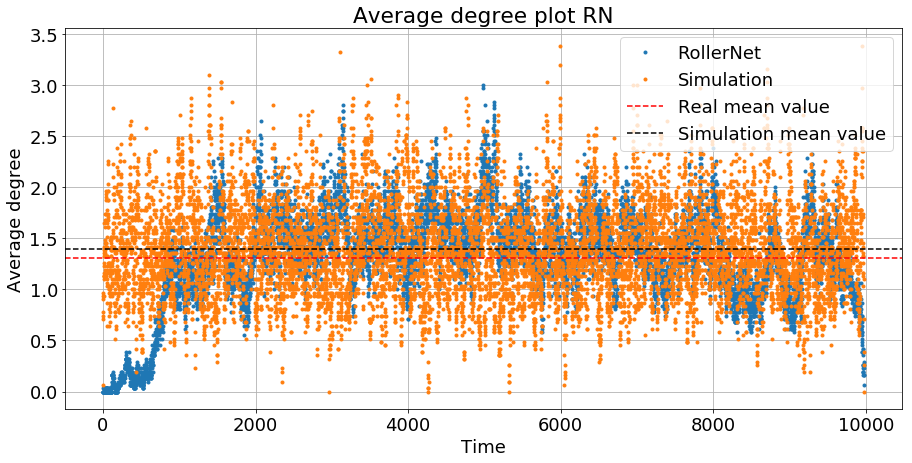

In [46]:
# Plots
plt.figure(figsize=(15,7))
plt.plot(Avg_degree_RN,'.', label = 'RollerNet')
plt.plot(Avg_degree_RN_sim,'.', label = 'Simulation')
plt.axhline(y=np.mean(Avg_degree_RN), color='r', linestyle='--', label = 'Real mean value')
plt.axhline(y=np.mean(Avg_degree_RN_sim), color='k', linestyle='--', label = 'Simulation mean value')
plt.xlabel('Time')
plt.ylabel('Average degree')
plt.title('Average degree plot RN')
plt.legend()
plt.grid(True)

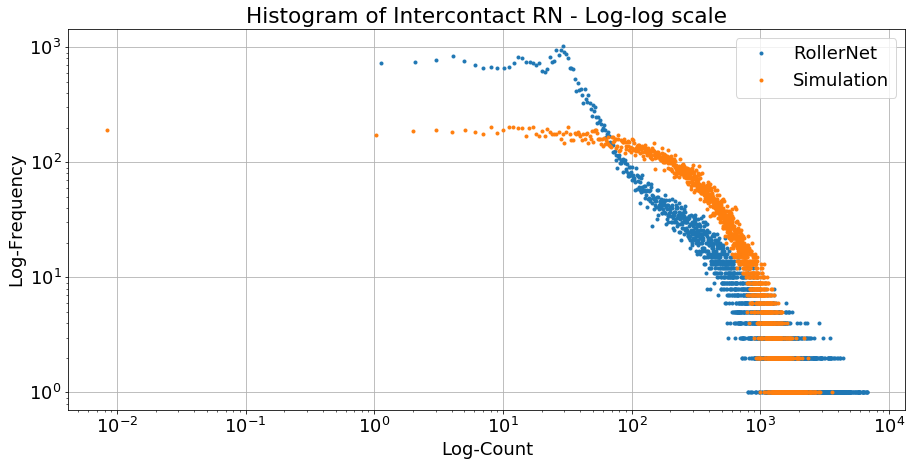

In [47]:
# Intercontact duration

inter_contact_RN_sim = inter_contact(RN_sim)
Hist_RN_sim = np.histogram(inter_contact_RN_sim[:,2], bins = len(inter_contact_RN_sim[:,2]))

plt.figure(figsize=(15,7))
plt.loglog(Hist_RN[1][1:],Hist_RN[0],'.', label = 'RollerNet')
plt.loglog(Hist_RN_sim[1][1:],Hist_RN_sim[0],'.', label = 'Simulation')
plt.xlabel('Log-Count')
plt.ylabel('Log-Frequency')
plt.title('Histogram of Intercontact RN - Log-log scale')
plt.legend()
plt.grid(True)

#### Comment:

The previous approach is not very realistic (we don't capture correlation between $p$ and $d$). Let's consider a joint probability distribution on $(p,q)$ and estimate it using a 2D kernel estimator. 

Text(0,0.5,'d')

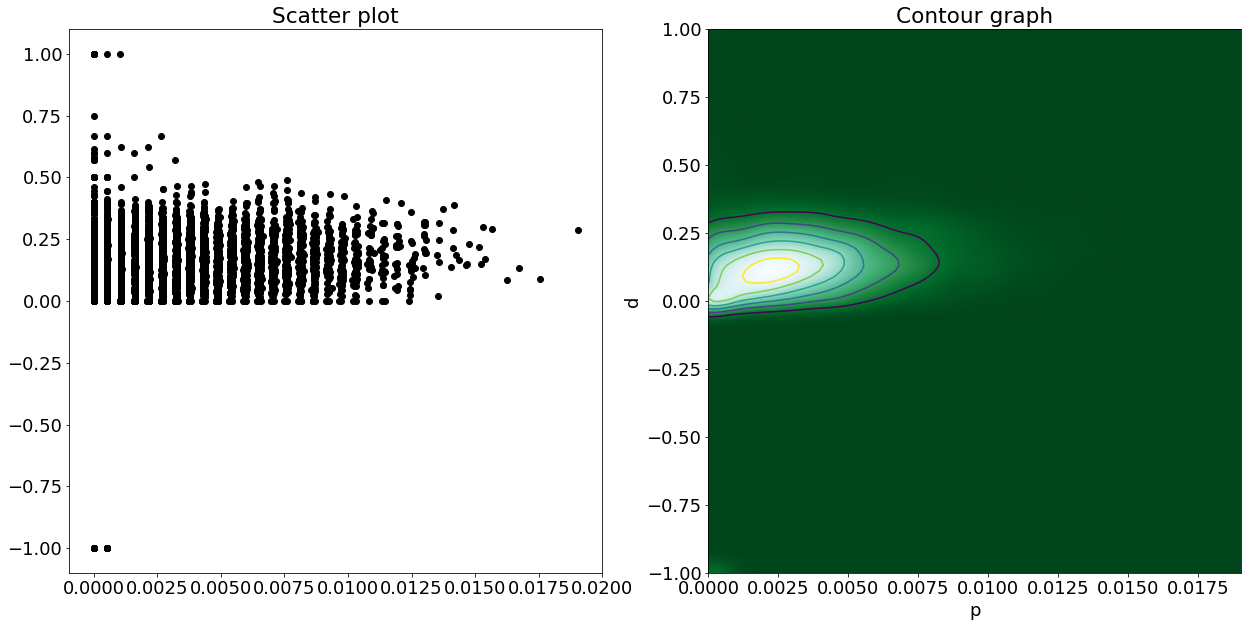

In [48]:
from scipy.stats import kde
 
p = Fractions_create_delete_RN[:,1]
d = Fractions_create_delete_RN[:,2]

data = np.column_stack((p,d))
x, y = p,d
 
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(21, 10))

#  a Scatterplot
axes[0].set_title('Scatter plot')
axes[0].plot(x, y, 'ko')
plt.xlabel('p')
plt.ylabel('d')

# 
nbins = 100

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data 
k = kde.gaussian_kde(data.T)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

# contour
axes[1].set_title('Contour graph')
axes[1].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
axes[1].contour(xi, yi, zi.reshape(xi.shape) )
plt.xlabel('p')
plt.ylabel('d')

In [49]:
# Simulation of graph evolution 
tt = time.time()

# Start with an empty graph - Simulation for RN
graph = np.empty([0, 2])
T = tot_Duration_RN
In_list = []

### Sample according to an estimated law
p_,d_ = k.resample(size=T+1)

#p_[p_<0] = 0
d_[d_<0] = 0
###

Nb_nodes = nb_Nodes_RN
edges_ = edges(nb_Nodes_RN)

for t in range(tot_Duration_RN):
    # at each time iteration, creat a new graph and append the list of created/deleted edges
    # Simulate d according to the distribution
    graph, In = Next_graph(graph, p_[t], d_[t], Nb_nodes,edges_) 
    In = np.column_stack((np.repeat(t,In.shape[0]),In))
    In_list.append(In)
    
Instance_list_RN = np.concatenate(In_list, axis=0)

print(time.time() - tt)

RN_sim = format_converting(Instance_list_RN).values
time_points_RN = range(tot_Duration_RN)
Avg_degree_RN_sim = [avg_degree(RN_sim,nb_Nodes_RN,t) for t in time_points_RN]

18.830108404159546


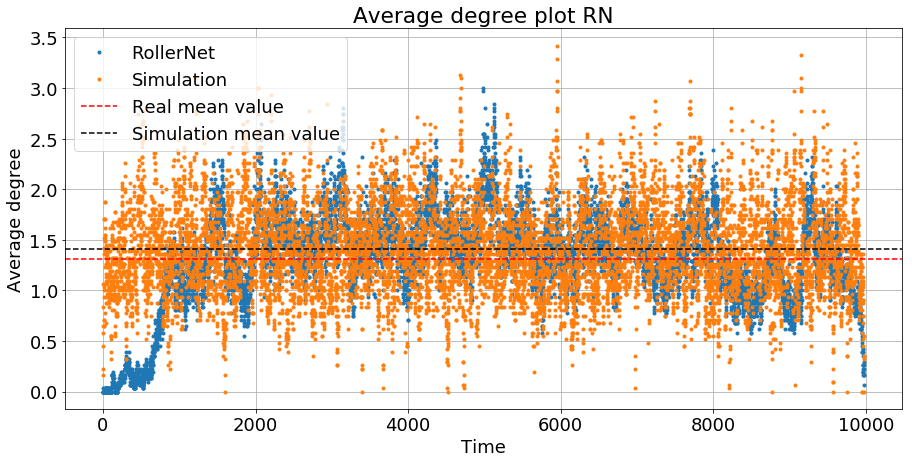

In [50]:
plt.figure(figsize=(15,7))
plt.plot(Avg_degree_RN,'.', label = 'RollerNet')
plt.plot(Avg_degree_RN_sim,'.', label = 'Simulation')
plt.axhline(y=np.mean(Avg_degree_RN), color='r', linestyle='--', label = 'Real mean value')
plt.axhline(y=np.mean(Avg_degree_RN_sim), color='k', linestyle='--', label = 'Simulation mean value')
plt.xlabel('Time')
plt.ylabel('Average degree')
plt.title('Average degree plot RN')
plt.legend()
plt.grid(True)

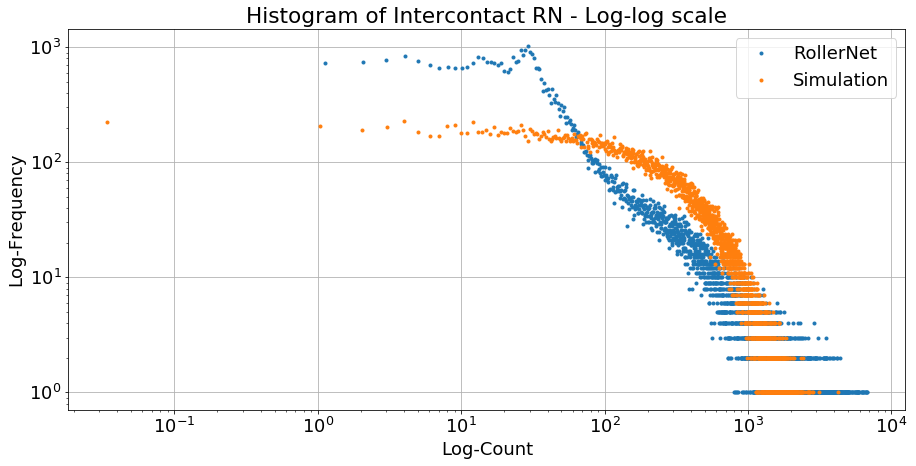

In [51]:
# Intercontact duration

inter_contact_RN_sim = inter_contact(RN_sim)
Hist_RN_sim = np.histogram(inter_contact_RN_sim[:,2], bins = len(inter_contact_RN_sim[:,2]))

plt.figure(figsize=(15,7))
plt.loglog(Hist_RN[1][1:],Hist_RN[0],'.', label = 'RollerNet')
plt.loglog(Hist_RN_sim[1][1:],Hist_RN_sim[0],'.', label = 'Simulation')
plt.xlabel('Log-Count')
plt.ylabel('Log-Frequency')
plt.title('Histogram of Intercontact RN - Log-log scale')
plt.legend()
plt.grid(True)

### IC simulation 
For IC we use another approach. From the graph of AVG-degree we see some seasonality..
Model : for each season choose an appropriate p and d (estimate mean on each zone)



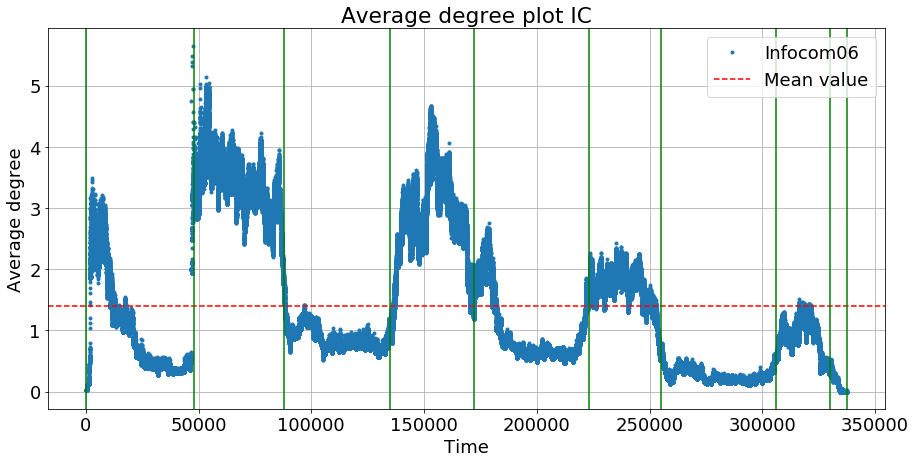

In [52]:
#### For IC

# Plot average degree IC
plt.figure(figsize=(15,7))
plt.plot(Avg_degree_IC,'.', label = 'Infocom06')
plt.axhline(y=np.mean(Avg_degree_IC), color='r', linestyle='--', label = 'Mean value')
plt.xlabel('Time')
plt.ylabel('Average degree')
plt.title('Average degree plot IC')
plt.legend(loc=1)
plt.grid(True)

## Phases:
t_phases = [0,48000,88000,135000,172000,223000,255000,306000,330000,len(Avg_degree_IC)];
for xc in t_phases:
    plt.axvline(x=xc, color = 'green')

In [53]:
# Get list of p,d on each intervall (between two green lines)

p_IC = Fractions_create_delete_IC[:,1]
d_IC = Fractions_create_delete_IC[:,2]

p_IC = p_IC[p_IC >= 0]
d_IC = d_IC[d_IC >= 0]

list_p = []
list_d = []

for i in np.arange(0,len(t_phases)-1):
    list_p.append(np.repeat(p_IC[t_phases[i]:t_phases[i+1]].mean(),t_phases[i+1]-t_phases[i]))
    list_d.append(np.repeat(d_IC[t_phases[i]:t_phases[i+1]].mean(),t_phases[i+1]-t_phases[i]))
    
list_p = np.concatenate(list_p,axis = 0)
list_d = np.concatenate(list_d,axis = 0)

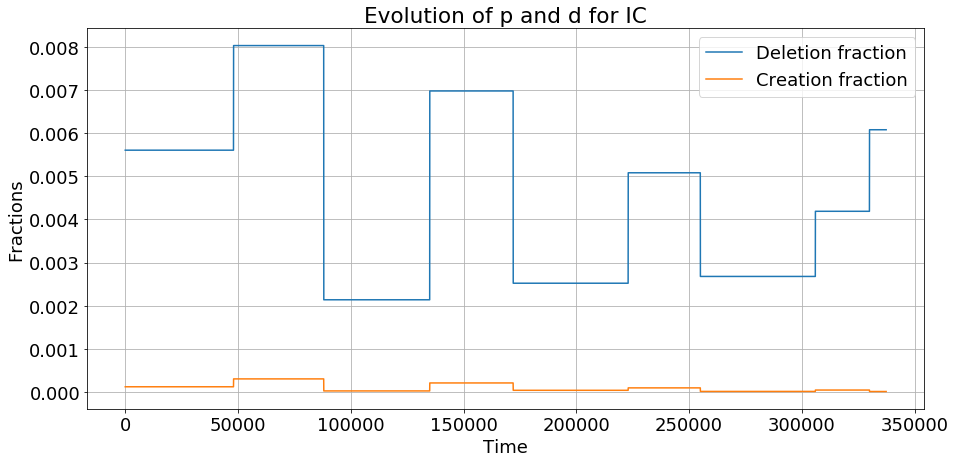

In [54]:
plt.figure(figsize=(15,7))
plt.plot(list_d, label ='Deletion fraction')
plt.plot(list_p, label = 'Creation fraction')
plt.title('Evolution of p and d for IC')
plt.xlabel('Time')
plt.ylabel('Fractions')
plt.legend()
plt.grid(True)

*Attention : la case ci-dessous met 20 à 30 minutes à être exécutée.*

Pour gagner du temps, nous avons enregistré le résultat de cette cellule dans le fichier Instance_list_IC_sim.pkl, il est possible d'en charger le contenu dans le notebook simplement avec la cellule qui suit celle-ci.

In [55]:
# Simulation of graph evolution
tt = time.time()

# Start with an empty graph - Simulation for IC
graph = np.empty([0, 2])
T = tot_Duration_IC
In_list = []
p = list_p
d = list_d
Nb_nodes = nb_Nodes_IC
edges_ = edges(nb_Nodes_IC)

for t in range(T):
    # at each time iteration, creat a new graph and append the list of created/deleted edges
    graph, In = Next_graph(graph, p[t], d[t], Nb_nodes,edges_) 
    In = np.column_stack((np.repeat(t,In.shape[0]),In))
    In_list.append(In)

Instance_list_IC_sim = np.concatenate(In_list, axis=0)

file_sim = "res/Instance_list_IC_sim.npy"
np.save(file_sim,Instance_list_IC_sim)

print(time.time() - tt)

1519.804045200348


In [57]:
Instance_list_IC_sim = np.load("res/Instance_list_IC_sim.npy")

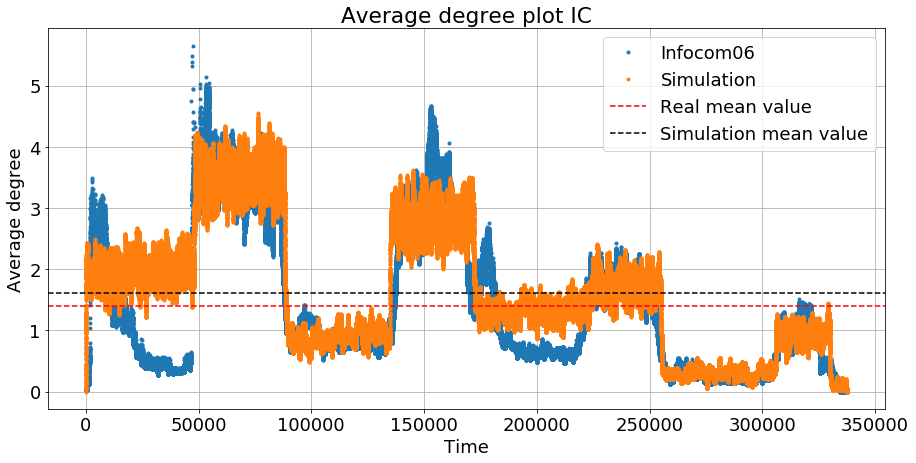

In [58]:
IC_sim = format_converting(Instance_list_IC_sim).values

Avg_degree_IC_sim = [avg_degree(IC_sim,nb_Nodes_IC,t) for t in time_points_IC]

# Plot average degree IC
plt.figure(figsize=(15,7))
plt.plot(Avg_degree_IC,'.', label = 'Infocom06')
plt.plot(Avg_degree_IC_sim,'.', label = 'Simulation')
plt.axhline(y=np.mean(Avg_degree_IC), color='r', linestyle='--', label = 'Real mean value')
plt.axhline(y=np.mean(Avg_degree_IC_sim), color='k', linestyle='--', label = 'Simulation mean value')
plt.xlabel('Time')
plt.ylabel('Average degree')
plt.title('Average degree plot IC')
plt.legend()
plt.grid(True)

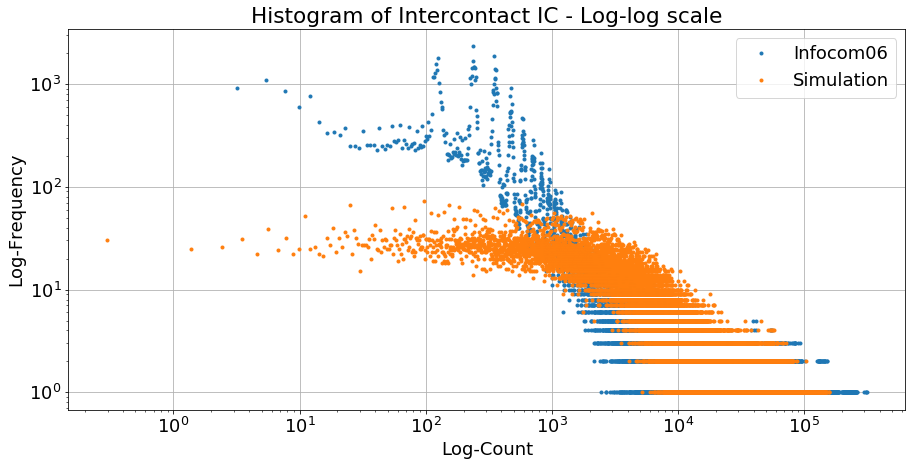

In [59]:
# Intercontact duration

inter_contact_IC_sim = inter_contact(IC_sim)
Hist_IC_sim = np.histogram(inter_contact_IC_sim[:,2], bins = len(inter_contact_IC_sim[:,2]))

plt.figure(figsize=(15,7))
plt.loglog(Hist_IC[1][1:],Hist_IC[0],'.', label = 'Infocom06')
plt.loglog(Hist_IC_sim[1][1:],Hist_IC_sim[0],'.', label = 'Simulation')
plt.xlabel('Log-Count')
plt.ylabel('Log-Frequency')
plt.title('Histogram of Intercontact IC - Log-log scale')
plt.legend()
plt.grid(True)